In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # type: ignore
from tensorflow.keras.models import load_model # type: ignore

In [15]:
df = pd.read_csv('Data_In_2.csv')
df.rename(columns = {'company_name' : 'Company'}, inplace = True)

# Filter rows where 'Type' is equal to 'Health'
factor = 'Company'
search_term = 'AMAZON'
filtered_df = df[df[factor] == search_term]

In [16]:
data = filtered_df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, 0]
        label = data[i + seq_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [18]:
seq_length = 10
n_samples = len(data_scaled)
sequences, labels = create_sequences(data_scaled, seq_length)
split = int(0.9 * len(sequences))
X_test, y_test = sequences[split:], labels[split:]
X_train, y_train = sequences[:split], labels[:split]

In [21]:
predictor = load_model('model_lstm_8.keras')
amazn = predictor.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [22]:
amazn = scaler.inverse_transform(amazn)
amazn_y = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
dates_test = filtered_df['Date'].iloc[split + seq_length:]
df_plot_lstm = pd.DataFrame({'Date': dates_test[:len(amazn)], 'Real': amazn_y.flatten(), 'Predict': amazn.flatten()})

df_plot_lstm.tail(10)
# df_plot_lstm.to_csv('AMAZON_2.csv')

In [28]:
signals = df_plot_lstm.copy()
# signals.head(3)

,Date,Real,Predict
31657,2021-09-03,173.902496,175.397247
31658,2021-09-07,175.464493,176.063309
31659,2021-09-08,176.274994,177.236206


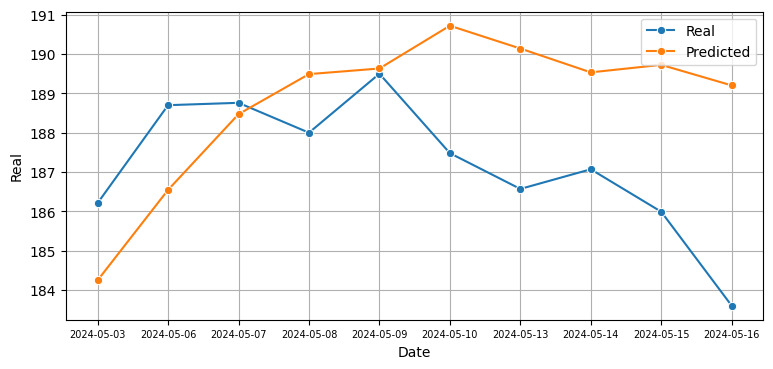

In [43]:
plt.figure(figsize = (9, 4))

sns.lineplot(
    data = signals[-10:],
    x = 'Date', 
    y = 'Real',
    marker = 'o',
    label = 'Real'
)

# Second line
sns.lineplot(
    data = signals[-10:],
    x = 'Date', 
    y = 'Predict',
    marker = 'o',
    label = 'Predicted'
)

plt.xticks(rotation = 0, fontsize = 7)
plt.grid(True)
plt.show()